#### Synthetic Data Generation

In [2]:
"""
Synthetic Digital Wellbeing Dataset Generator (with User Info)
Generates 100,000 rows of synthetic smartphone usage & wellbeing data.

Features:
- user_id
- age, gender, profession, city_tier
- daily_screen_time_min
- num_app_switches
- sleep_hours
- notification_count
- social_media_time_min
- focus_score, mood_score, anxiety_level
- digital_wellbeing_score

Output:
- CSV file: synthetic_digital_wellbeing.csv
"""

import pandas as pd
import numpy as np
from faker import Faker

# Config

N_ROWS = 100000
OUTPUT_FILE = "synthetic_digital_wellbeing.csv"

faker = Faker()
np.random.seed(42)

# Helper distributions

professions = ["Student", "IT Professional", "Healthcare", "Teacher", "Freelancer", "Other"]
city_tiers = ["Tier 1", "Tier 2", "Tier 3"]

def generate_age():
    """Age distribution skewed to 18–35."""
    base = np.random.normal(loc=28, scale=8)  # mean 28 yrs
    return int(np.clip(base, 13, 60))

def generate_gender():
    return np.random.choice(["Male", "Female", "Other"], p=[0.48, 0.48, 0.04])

def generate_profession():
    return np.random.choice(professions, p=[0.35, 0.25, 0.1, 0.1, 0.1, 0.1])

def generate_city_tier():
    return np.random.choice(city_tiers, p=[0.4, 0.35, 0.25])

# Generate Data

data = {
    "user_id": [faker.uuid4() for _ in range(N_ROWS)],
    "age": [generate_age() for _ in range(N_ROWS)],
    "gender": [generate_gender() for _ in range(N_ROWS)],
    "profession": [generate_profession() for _ in range(N_ROWS)],
    "city_tier": [generate_city_tier() for _ in range(N_ROWS)],
}

# Screen time depends on age & profession
base_screen = np.random.normal(loc=300, scale=120, size=N_ROWS)  # avg 5 hrs
age_factor = np.clip((40 - np.array(data["age"])) / 40, 0.3, 1.2)  # younger = more time
profession_factor = [
    1.3 if p in ["Student", "IT Professional"] else 1.0 for p in data["profession"]
]
data["daily_screen_time_min"] = np.clip(base_screen * age_factor * profession_factor, 30, 900).astype(int)

# App switches correlated with screen time
data["num_app_switches"] = (data["daily_screen_time_min"] * np.random.uniform(0.15, 0.4, size=N_ROWS)).astype(int)

# Sleep hours (inverse with screen time)
data["sleep_hours"] = np.clip(
    np.random.normal(loc=8, scale=1, size=N_ROWS) - (data["daily_screen_time_min"] / 600), 
    3, 12
).round(1)

# Notifications (higher for students & IT)
base_notifications = np.random.poisson(lam=120, size=N_ROWS)
profession_boost = [1.4 if p in ["Student", "IT Professional"] else 1.0 for p in data["profession"]]
data["notification_count"] = (base_notifications * profession_boost).astype(int)

# Social media time = 20–60% of screen time
data["social_media_time_min"] = (np.array(data["daily_screen_time_min"]) * np.random.uniform(0.2, 0.6, size=N_ROWS)).astype(int)

# Focus score: lower if screen/social is high
data["focus_score"] = np.clip(
    10 - (np.array(data["daily_screen_time_min"]) / 250) - (np.array(data["social_media_time_min"]) / 500)
    + np.random.normal(0, 1, size=N_ROWS), 0, 10
).round(1)

# Mood score: improves with sleep, decreases with notifications
data["mood_score"] = np.clip(
    (np.array(data["sleep_hours"]) / 8 * 7) - (np.array(data["notification_count"]) / 400)
    + np.random.normal(0, 1, size=N_ROWS), 0, 10
).round(1)

# Anxiety level: higher with screen & notifications
data["anxiety_level"] = np.clip(
    (np.array(data["daily_screen_time_min"]) / 300) + (np.array(data["notification_count"]) / 300)
    + np.random.normal(0, 1, size=N_ROWS), 0, 10
).round(1)

# Digital wellbeing score: balance of all
data["digital_wellbeing_score"] = np.clip(
    60 + (np.array(data["focus_score"]) * 3) + (np.array(data["mood_score"]) * 2)
    - (np.array(data["anxiety_level"]) * 4) - (np.array(data["daily_screen_time_min"]) / 20)
    + np.random.normal(0, 5, size=N_ROWS),
    0, 100
).round(1)

# Save dataset

df = pd.DataFrame(data)
df.to_csv(OUTPUT_FILE, index=False)

print(f" Synthetic dataset generated: {OUTPUT_FILE}")

print("\nShape:", df.shape)


✅ Synthetic dataset generated: synthetic_digital_wellbeing.csv

Shape: (100000, 14)


#### Data Understanding (info, Null values, duplicates, Descriptive Statistics )

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('synthetic_digital_wellbeing.csv')
df

,user_id,age,gender,profession,city_tier,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
0,a1f5c3ff-0dfa-4052-baa9-fb7f2f7f59a8,31,Male,Other,Tier 2,141,43,7.1,130,55,10.0,3.8,1.2,84.2
1,1bfac133-1857-4ff5-9891-43f2bb02a35d,26,Female,IT Professional,Tier 2,71,10,8.0,170,30,7.7,5.4,2.3,79.0
2,b9e53091-a8a7-4614-b098-3bdc52dd7028,33,Male,IT Professional,Tier 2,107,31,7.0,177,50,8.9,4.6,0.9,86.9
3,e61d3106-8bbd-485c-993e-0f712516f0e2,40,Female,Teacher,Tier 2,92,15,8.5,136,21,9.0,5.6,0.4,91.1
4,9758ef53-96d7-48f9-8688-175b46f5e741,26,Male,IT Professional,Tier 2,174,45,5.0,166,57,8.7,1.8,1.0,85.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,a82d4b30-2608-430e-8b56-0a13dcd47ccd,26,Male,Other,Tier 2,107,39,8.3,99,39,10.0,4.4,2.9,91.7
99996,d77f3797-4078-4189-b2b6-f85d395e6588,23,Female,IT Professional,Tier 3,194,34,8.3,173,64,8.7,7.3,3.0,81.7
99997,6aad65e3-ba84-46be-a9e9-0db909ca57c0,31,Female,Teacher,Tier 1,35,9,9.4,119,16,10.0,10.0,0.0,100.0
99998,2000a706-6204-4f66-bebd-f7d3aab52330,26,Female,Teacher,Tier 1,172,42,8.1,126,103,9.5,6.5,1.6,84.0


In [11]:
df.columns

Index(['user_id', 'age', 'gender', 'profession', 'city_tier',
       'daily_screen_time_min', 'num_app_switches', 'sleep_hours',
       'notification_count', 'social_media_time_min', 'focus_score',
       'mood_score', 'anxiety_level', 'digital_wellbeing_score'],
      dtype='object')

In [4]:
df.info()   # in synthetic data datatypes are correctly defined.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   user_id                  100000 non-null  object 
 1   age                      100000 non-null  int64  
 2   gender                   100000 non-null  object 
 3   profession               100000 non-null  object 
 4   city_tier                100000 non-null  object 
 5   daily_screen_time_min    100000 non-null  int64  
 6   num_app_switches         100000 non-null  int64  
 7   sleep_hours              100000 non-null  float64
 8   notification_count       100000 non-null  int64  
 9   social_media_time_min    100000 non-null  int64  
 10  focus_score              100000 non-null  float64
 11  mood_score               100000 non-null  float64
 12  anxiety_level            100000 non-null  float64
 13  digital_wellbeing_score  100000 non-null  float64
dtypes: fl

In [6]:
df.isnull().sum()  # synthetic data does not usually have null values, but will still check for data integrity.

user_id                    0
age                        0
gender                     0
profession                 0
city_tier                  0
daily_screen_time_min      0
num_app_switches           0
sleep_hours                0
notification_count         0
social_media_time_min      0
focus_score                0
mood_score                 0
anxiety_level              0
digital_wellbeing_score    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [7]:
df.describe()  # Descriptive Statistics

,age,daily_screen_time_min,num_app_switches,sleep_hours,notification_count,social_media_time_min,focus_score,mood_score,anxiety_level,digital_wellbeing_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,27.620880,135.790780,36.797050,7.771195,148.54530,53.788940,9.170748,6.427469,1.049311,88.988640
std,7.766898,70.794737,22.388142,1.007111,27.05669,33.425492,0.826708,1.333197,0.884410,8.308432
min,13.000000,30.000000,4.000000,3.400000,78.00000,6.000000,4.700000,0.400000,0.000000,40.500000
25%,22.000000,87.000000,21.000000,7.100000,123.00000,30.000000,8.600000,5.500000,0.200000,83.800000
50%,28.000000,124.000000,32.000000,7.800000,152.00000,47.000000,9.300000,6.400000,0.900000,89.900000
75%,33.000000,171.000000,47.000000,8.400000,170.00000,69.000000,10.000000,7.300000,1.600000,95.500000
max,60.000000,649.000000,207.000000,12.000000,240.00000,329.000000,10.000000,10.000000,5.700000,100.000000


In [9]:
df.describe(include = 'O')

,user_id,gender,profession,city_tier
count,100000,100000,100000,100000
unique,100000,3,6,3
top,a1f5c3ff-0dfa-4052-baa9-fb7f2f7f59a8,Female,Student,Tier 1
freq,1,48103,34995,40063


#### Distribution Check (Realism Validation)

In [14]:
numeric_cols = ['age', 'daily_screen_time_min', 'num_app_switches', 'sleep_hours',
       'notification_count', 'social_media_time_min', 'focus_score',
        'mood_score', 'anxiety_level', 'digital_wellbeing_score']

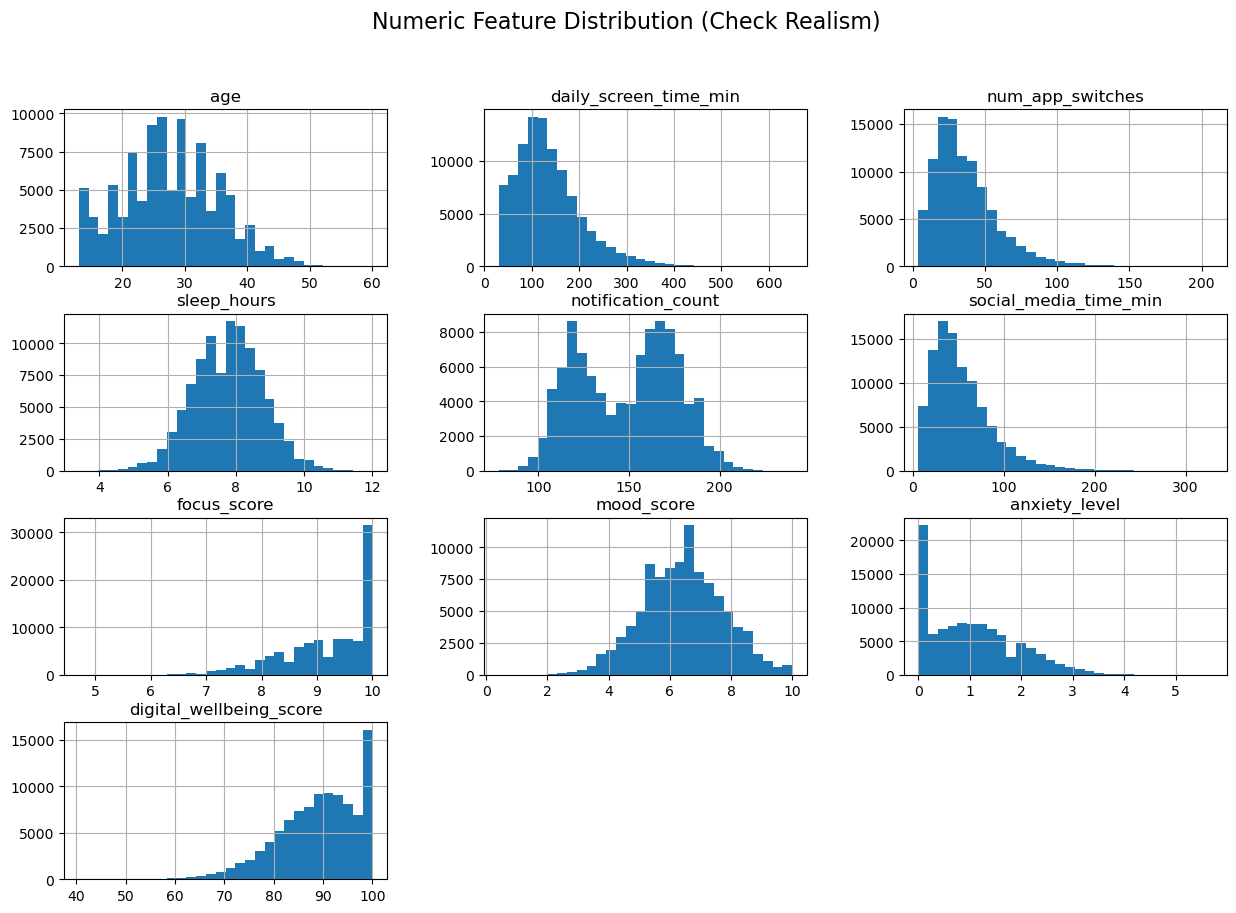

In [17]:
# Histogram for key features
df[numeric_cols].hist(figsize = (15,10), bins = 30)
plt.suptitle('Numeric Feature Distribution (Check Realism)', fontsize = 16)
plt.show()

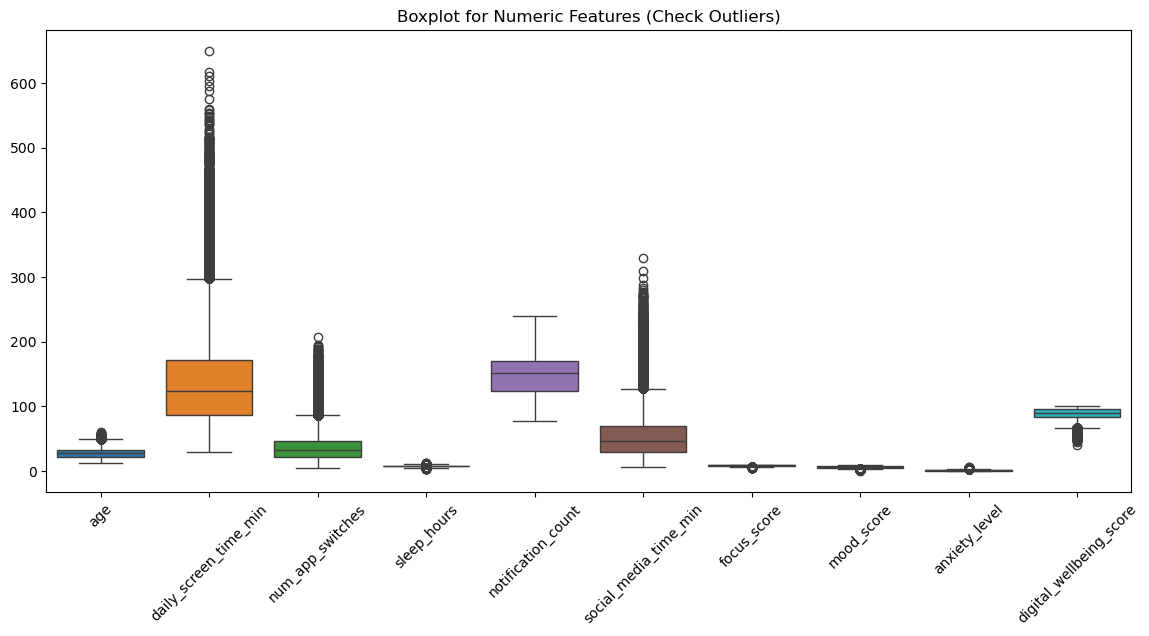

In [18]:
# outlier detection
plt.figure(figsize = (14,6))
sns.boxplot(data = df[numeric_cols])
plt.xticks(rotation = 45)
plt.title('Boxplot for Numeric Features (Check Outliers)')
plt.show()

#### Correlation Analysis

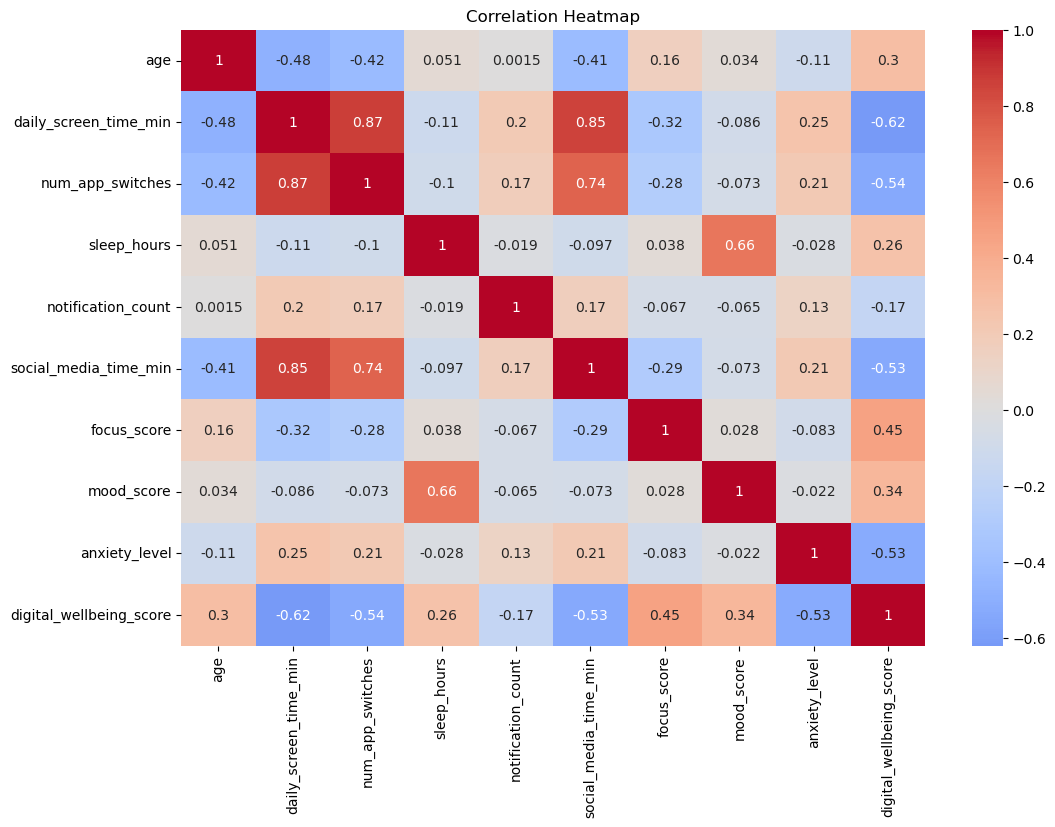

In [19]:
plt.figure(figsize = (12,8))
sns.heatmap(df[numeric_cols].corr(), annot = True, cmap = 'coolwarm', center = 0)
plt.title('Correlation Heatmap')
plt.show()

#### Demographic Distributions

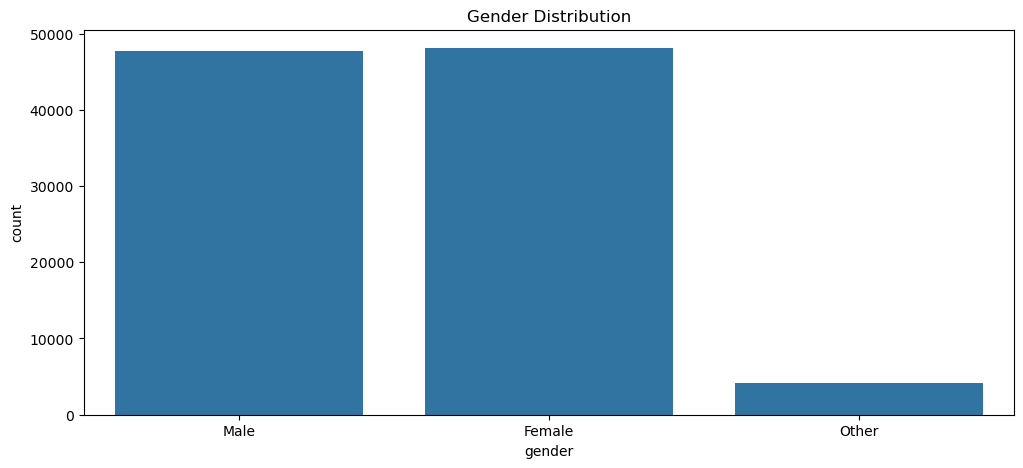

In [21]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'gender', data = df)
plt.title('Gender Distribution')
plt.show()

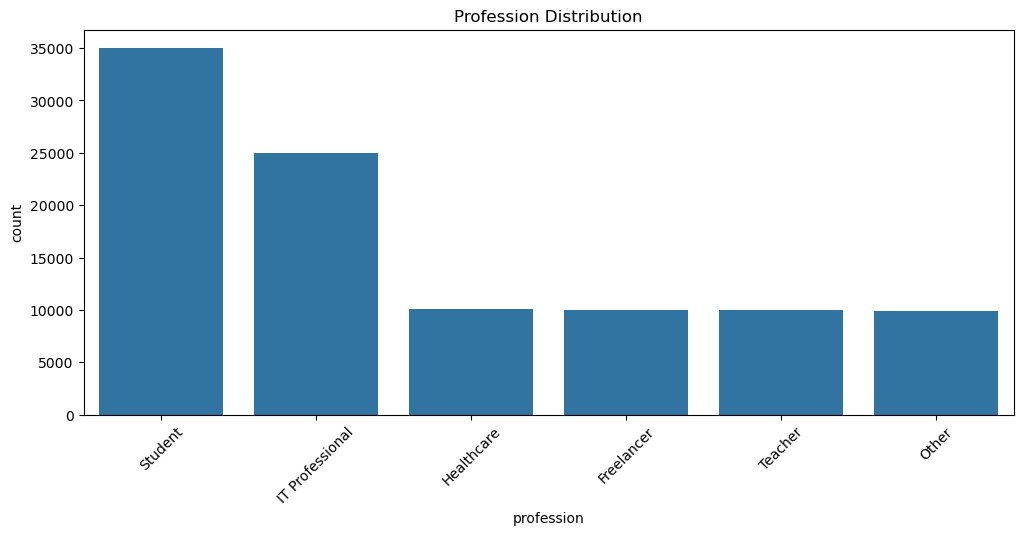

In [22]:
plt.figure(figsize=(12, 5))
sns.countplot(x="profession", data=df, order=df["profession"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Profession Distribution")
plt.show()

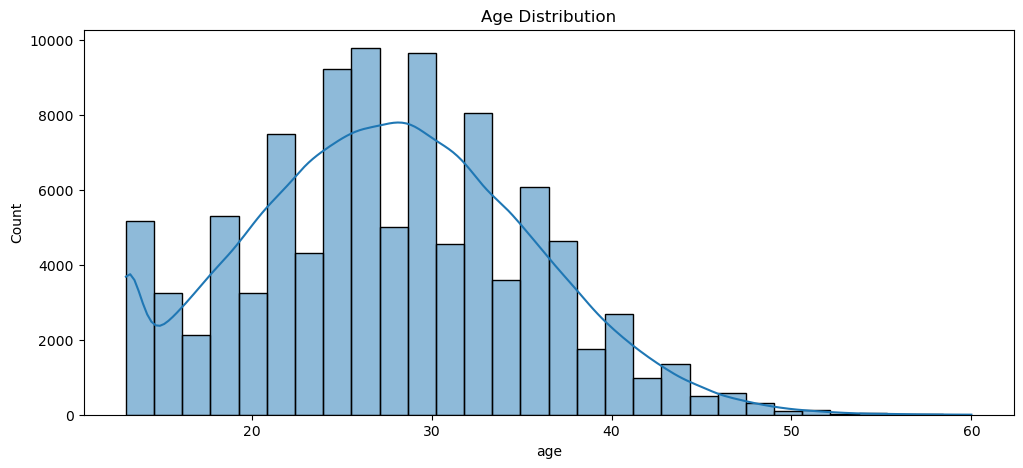

In [23]:
plt.figure(figsize=(12, 5))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

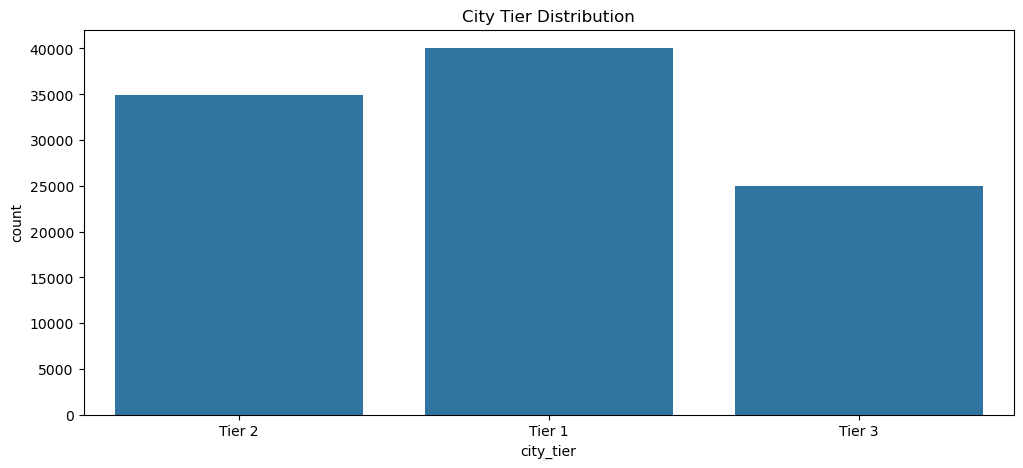

In [24]:
plt.figure(figsize=(12, 5))
sns.countplot(x="city_tier", data=df)
plt.title("City Tier Distribution")
plt.show()

#### Feature Engineering

In [9]:
#Feature Engineering 

FILE_PATH = "synthetic_digital_wellbeing.csv"
df = pd.read_csv(FILE_PATH)

# 0. Derive Unlock Frequency

np.random.seed(42)
avg_session_lengths = np.random.randint(3, 6, size=len(df))  # random between 3–5 mins
df["unlock_frequency"] = (df["daily_screen_time_min"] / avg_session_lengths).astype(int)

# 1. Time Ratios & Balances

df["screen_time_per_hour_awake"] = df["daily_screen_time_min"] / ((24 - df["sleep_hours"]) * 60)
df["social_media_ratio"] = df["social_media_time_min"] / (df["daily_screen_time_min"] + 1)

# 2. Threshold Flags (Binary)

df["is_heavy_user"] = (df["daily_screen_time_min"] > 360).astype(int)     # >6 hours/day
df["is_poor_sleeper"] = (df["sleep_hours"] < 6).astype(int)              # <6 hours sleep
df["is_frequent_unlocker"] = (df["unlock_frequency"] > 100).astype(int)  # >100 unlocks/day

# 3. Aggregated Features

df["avg_session_length_min"] = df["daily_screen_time_min"] / (df["unlock_frequency"] + 1)

# 4. Nonlinear Transforms

df["log_screen_time"] = np.log1p(df["daily_screen_time_min"])
df["sqrt_unlock_frequency"] = np.sqrt(df["unlock_frequency"])

# 5. Interaction Features

df["screen_sleep_interaction"] = df["daily_screen_time_min"] * (1 / (df["sleep_hours"] + 1))
df["anxiety_focus_interaction"] = df["anxiety_level"] * (10 - df["focus_score"])

# 6. User Profile Derived Features

def age_group(age):
    if age <= 18:
        return "Teen"
    elif 19 <= age <= 25:
        return "Young Adult"
    elif 26 <= age <= 40:
        return "Adult"
    else:
        return "Middle-aged"

df["age_group"] = df["age"].apply(age_group)

df["profession_category"] = df["profession"].replace({
    "Student": "Student",
    "IT Professional": "Professional",
    "Teacher": "Professional",
    "Healthcare": "Professional",
    "Freelancer": "Self-Employed",
    "Other": "Other"
})

df.to_csv("digital_wellbeing_engineered.csv", index=False)

print("Feature engineering complete. Unlock frequency derived.")
print(f"Total Features after engineering: {df.shape[1]}")


Feature engineering complete. Unlock frequency derived.
Total Features after engineering: 27


Unlock Frequency Validation Report

🔹 Unlock Frequency Range: 6 - 203
🔹 Avg Unlocks per Day: 35.13
🔹 Median Unlocks per Day: 31.0
🔹 % Frequent Unlockers (>100/day): 1.15 %

📈 Correlation (Screen Time vs Unlocks): 0.91 (Expected: strong positive)

Unlock Frequency by Age Group (Mean):
age_group
Adult          28.002983
Middle-aged    27.714775
Teen           56.613387
Young Adult    40.598743
Name: unlock_frequency, dtype: float64 

Unlock Frequency by Profession (Mean):
profession_category
Other            29.839790
Professional     34.695793
Self-Employed    29.668529
Student          38.752222
Name: unlock_frequency, dtype: float64 



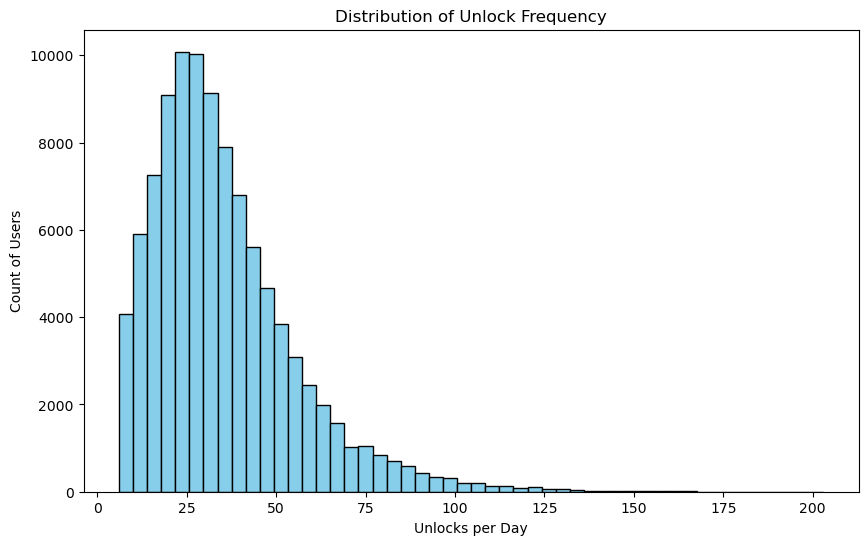

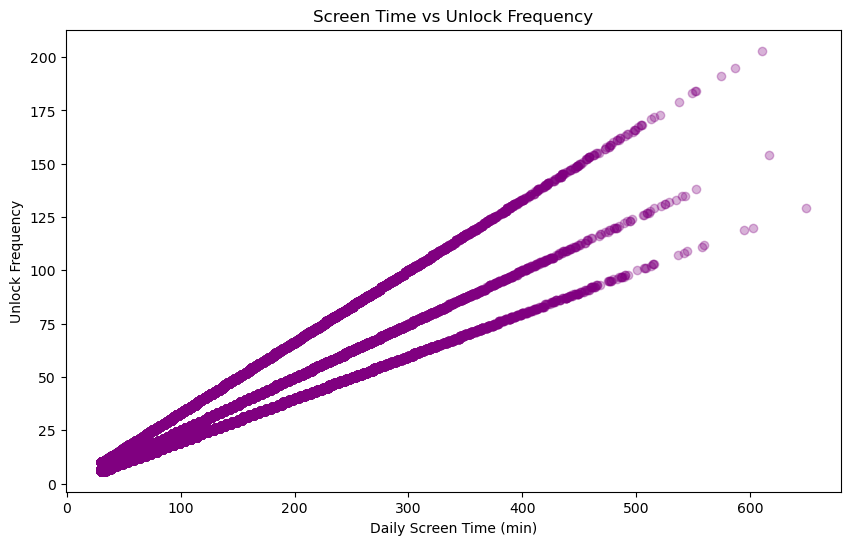

<Figure size 1000x600 with 0 Axes>

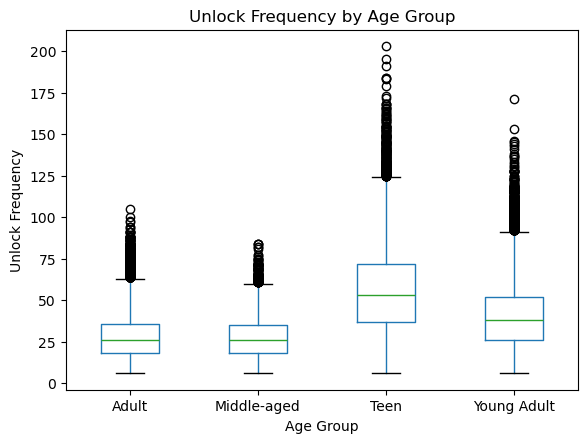

In [11]:
FILE_PATH = "digital_wellbeing_engineered.csv"
df = pd.read_csv(FILE_PATH)

print("Unlock Frequency Validation Report\n")

# 1. Basic Stats

print("Unlock Frequency Range:", df["unlock_frequency"].min(), "-", df["unlock_frequency"].max())
print("Avg Unlocks per Day:", round(df["unlock_frequency"].mean(), 2))
print("Median Unlocks per Day:", df["unlock_frequency"].median())
print("% Frequent Unlockers (>100/day):", round((df["is_frequent_unlocker"].mean()) * 100, 2), "%\n")

# 2. Relationship with Screen Time

corr = df["daily_screen_time_min"].corr(df["unlock_frequency"])
print(f" Correlation (Screen Time vs Unlocks): {corr:.2f} (Expected: strong positive)\n")

# 3. Unlocks by User Groups

print("Unlock Frequency by Age Group (Mean):")
print(df.groupby("age_group")["unlock_frequency"].mean(), "\n")

print("Unlock Frequency by Profession (Mean):")
print(df.groupby("profession_category")["unlock_frequency"].mean(), "\n")

# 4. Visualizations

plt.figure(figsize=(10, 6))
plt.hist(df["unlock_frequency"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Unlock Frequency")
plt.xlabel("Unlocks per Day")
plt.ylabel("Count of Users")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df["daily_screen_time_min"], df["unlock_frequency"], alpha=0.3, color="purple")
plt.title("Screen Time vs Unlock Frequency")
plt.xlabel("Daily Screen Time (min)")
plt.ylabel("Unlock Frequency")
plt.show()

plt.figure(figsize=(10, 6))
df.boxplot(column="unlock_frequency", by="age_group", grid=False)
plt.title("Unlock Frequency by Age Group")
plt.suptitle("")
plt.xlabel("Age Group")
plt.ylabel("Unlock Frequency")
plt.show()

#### EDA & Visualization

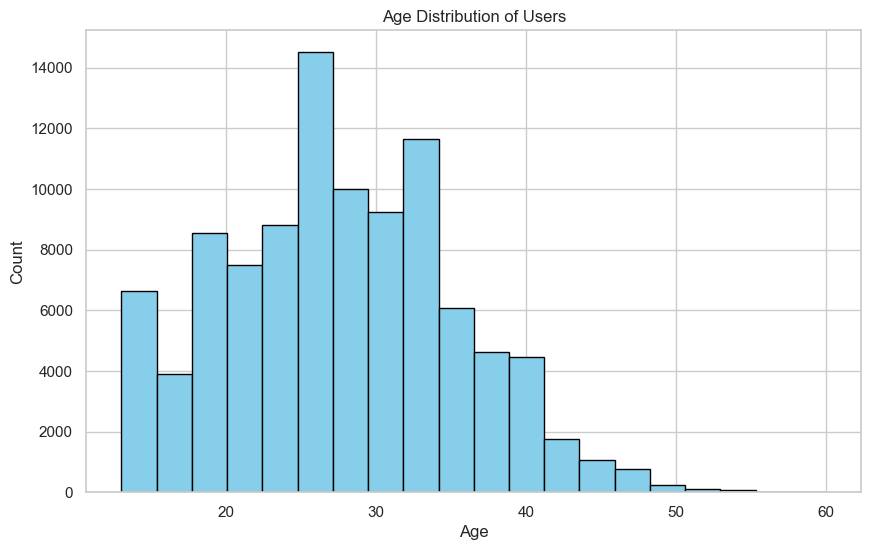

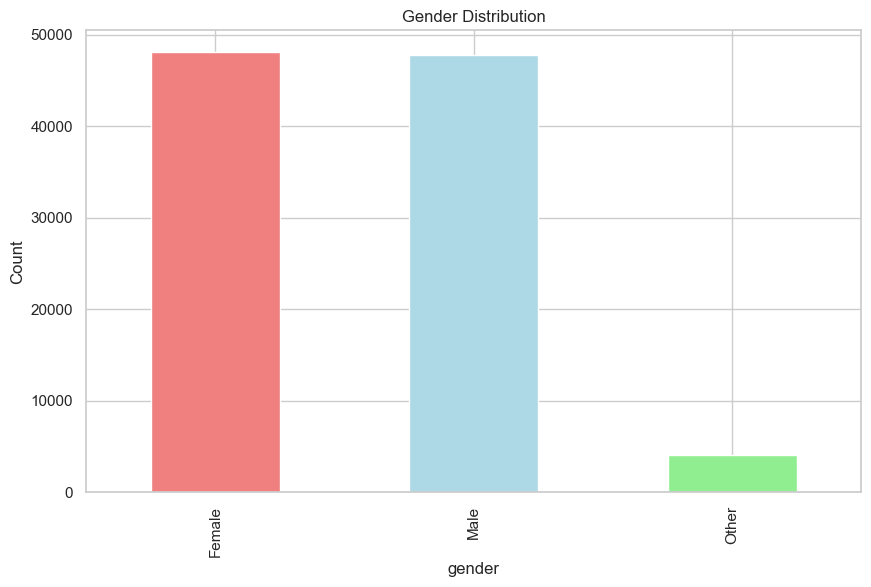

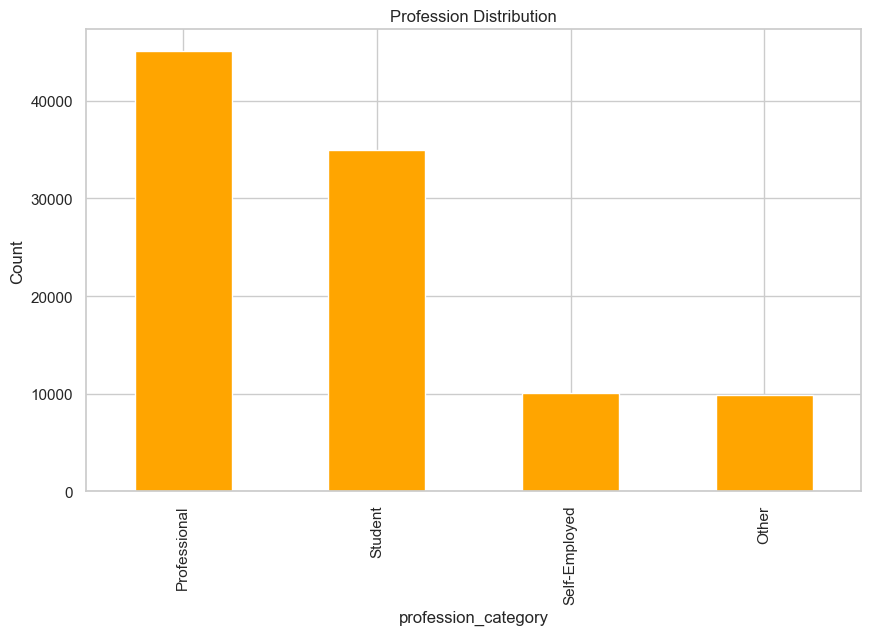

In [3]:
"""
EDA & Visualization for Digital Wellbeing Dataset
"""
FILE_PATH = "digital_wellbeing_engineered.csv"
df = pd.read_csv(FILE_PATH)

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. General Distribution
# Age Distribution
plt.hist(df["age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Gender Split
df["gender"].value_counts().plot(kind="bar", color=["lightcoral","lightblue","lightgreen"])
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()

# Profession Split
df["profession_category"].value_counts().plot(kind="bar", color="orange")
plt.title("Profession Distribution")
plt.ylabel("Count")
plt.show()

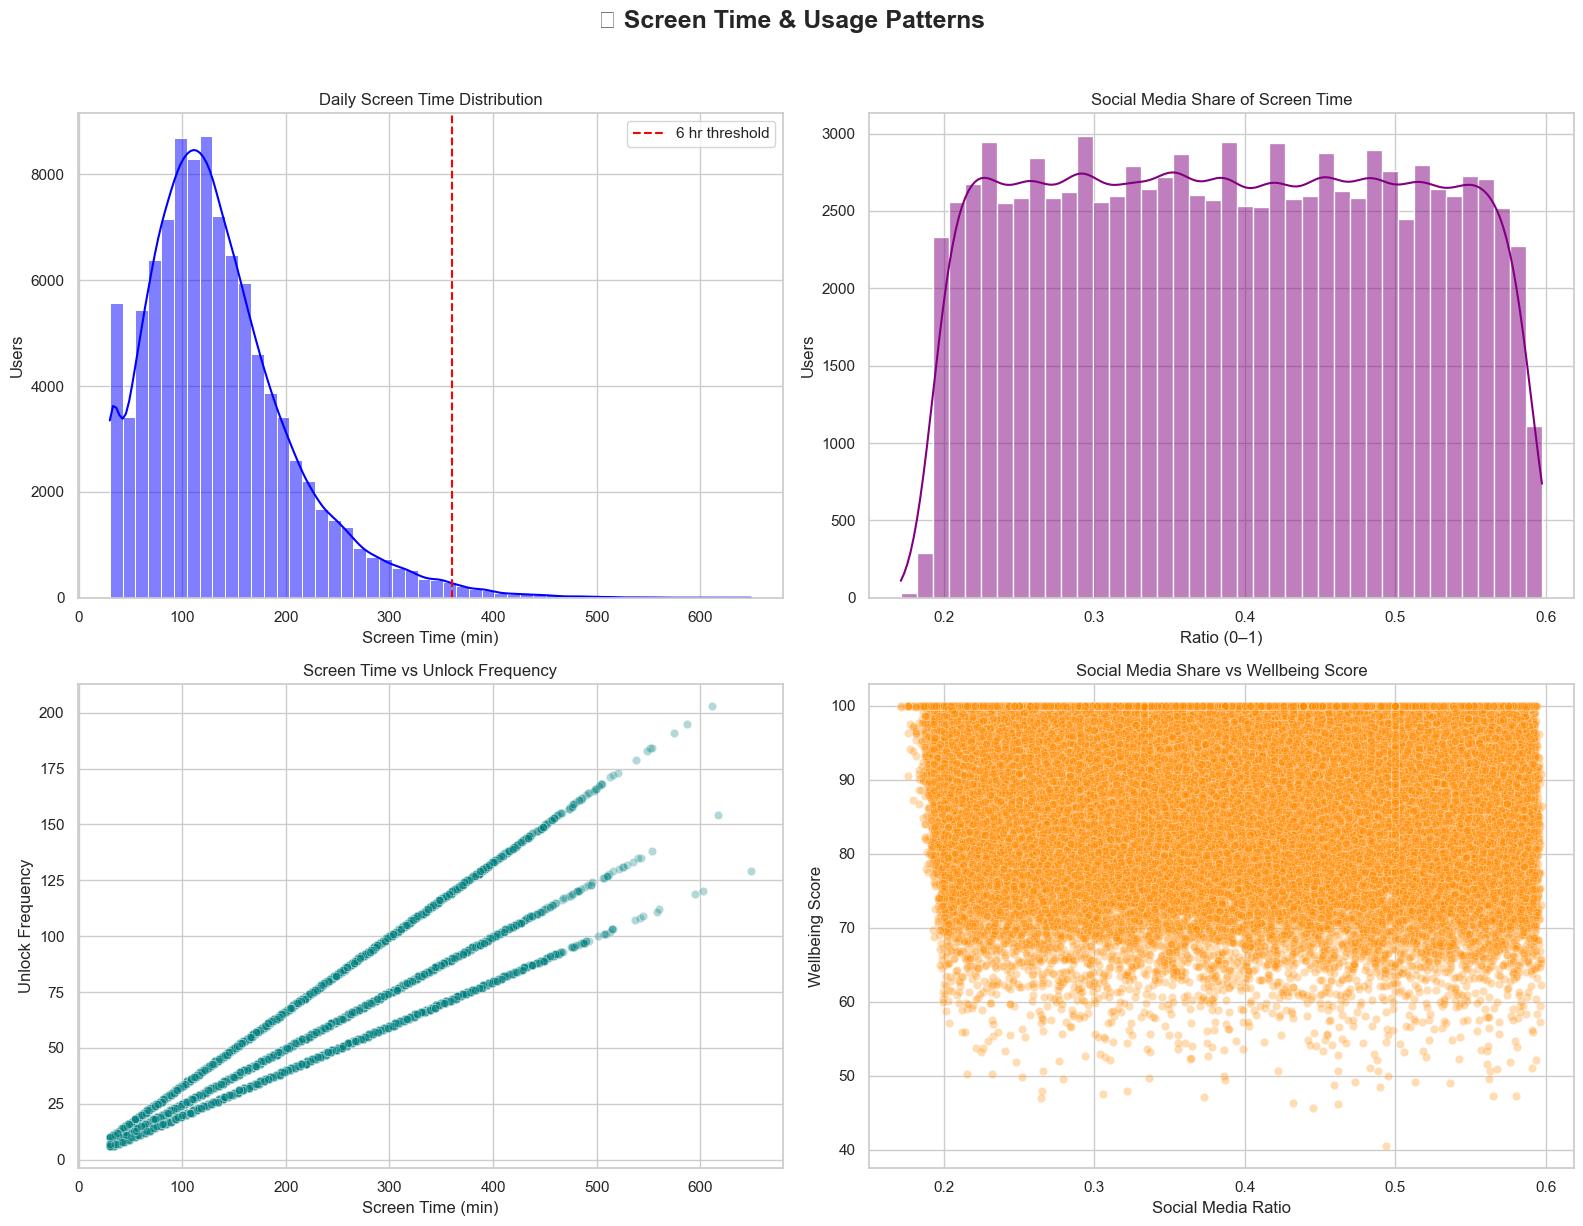

In [34]:
#Screen Time & Usage Patterns Dashboard

FILE_PATH = "digital_wellbeing_engineered.csv"
df = pd.read_csv(FILE_PATH)

# Style settings
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (16, 12)

# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2)

# Plot 1: Daily Screen Time Distribution

sns.histplot(df["daily_screen_time_min"], bins=50, kde=True, color="blue", ax=axes[0,0])
axes[0,0].axvline(360, color="red", linestyle="--", label="6 hr threshold")
axes[0,0].set_title("Daily Screen Time Distribution")
axes[0,0].set_xlabel("Screen Time (min)")
axes[0,0].set_ylabel("Users")
axes[0,0].legend()

# Plot 2: Social Media Ratio Distribution

sns.histplot(df["social_media_ratio"], bins=40, kde=True, color="purple", ax=axes[0,1])
axes[0,1].set_title("Social Media Share of Screen Time")
axes[0,1].set_xlabel("Ratio (0–1)")
axes[0,1].set_ylabel("Users")

# Plot 3: Screen Time vs Unlock Frequency
sns.scatterplot(x="daily_screen_time_min", y="unlock_frequency", data=df, alpha=0.3, color="teal", ax=axes[1,0])
axes[1,0].set_title("Screen Time vs Unlock Frequency")
axes[1,0].set_xlabel("Screen Time (min)")
axes[1,0].set_ylabel("Unlock Frequency")

# Plot 4: Social Media Ratio vs Wellbeing
sns.scatterplot(x="social_media_ratio", y="digital_wellbeing_score", data=df, alpha=0.3, color="darkorange", ax=axes[1,1])
axes[1,1].set_title("Social Media Share vs Wellbeing Score")
axes[1,1].set_xlabel("Social Media Ratio")
axes[1,1].set_ylabel("Wellbeing Score")

# Adjust layout
plt.suptitle("📱 Screen Time & Usage Patterns", fontsize=18, y=1.02, fontweight="bold")
plt.tight_layout()
plt.show()



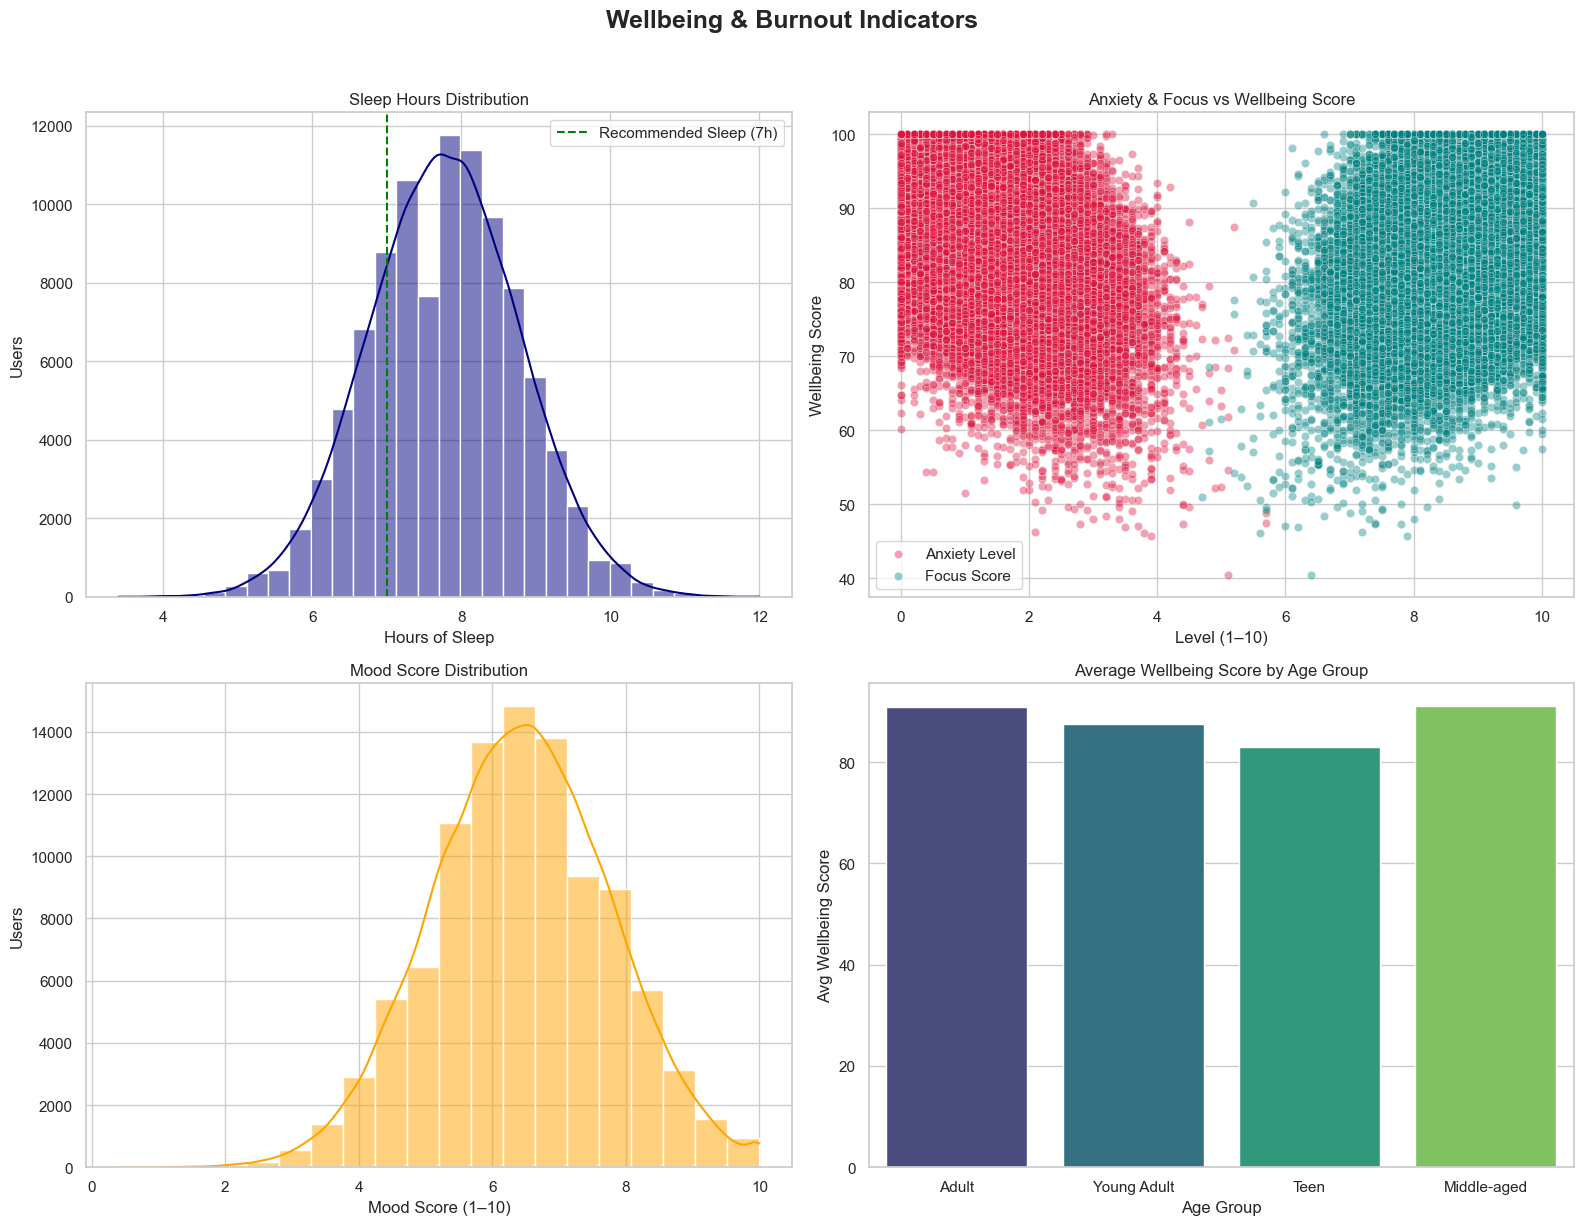

In [35]:
# Wellbeing & Burnout Indicators Dashboard 

FILE_PATH = "digital_wellbeing_engineered.csv"
df = pd.read_csv(FILE_PATH)

# Style settings
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (16, 12)

# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2)

# Plot 1: Sleep Hours Distribution
sns.histplot(df["sleep_hours"], bins=30, kde=True, color="navy", ax=axes[0,0])
axes[0,0].axvline(7, color="green", linestyle="--", label="Recommended Sleep (7h)")
axes[0,0].set_title("Sleep Hours Distribution")
axes[0,0].set_xlabel("Hours of Sleep")
axes[0,0].set_ylabel("Users")
axes[0,0].legend()

# Plot 2: Anxiety & Focus vs Wellbeing
sns.scatterplot(x="anxiety_level", y="digital_wellbeing_score", data=df,
                alpha=0.4, color="crimson", ax=axes[0,1], label="Anxiety Level")
sns.scatterplot(x="focus_score", y="digital_wellbeing_score", data=df,
                alpha=0.4, color="teal", ax=axes[0,1], label="Focus Score")
axes[0,1].set_title("Anxiety & Focus vs Wellbeing Score")
axes[0,1].set_xlabel("Level (1–10)")
axes[0,1].set_ylabel("Wellbeing Score")
axes[0,1].legend()

# Plot 3: Mood Score Distribution

sns.histplot(df["mood_score"], bins=20, kde=True, color="orange", ax=axes[1,0])
axes[1,0].set_title("Mood Score Distribution")
axes[1,0].set_xlabel("Mood Score (1–10)")
axes[1,0].set_ylabel("Users")

# Plot 4: Avg Wellbeing Score by Age Group

sns.barplot(x="age_group", y="digital_wellbeing_score", data=df, ci=None,
            palette="viridis", ax=axes[1,1])
axes[1,1].set_title("Average Wellbeing Score by Age Group")
axes[1,1].set_xlabel("Age Group")
axes[1,1].set_ylabel("Avg Wellbeing Score")

# Adjust layout
plt.suptitle("Wellbeing & Burnout Indicators", fontsize=18, y=1.02, fontweight="bold")
plt.tight_layout()
plt.show()

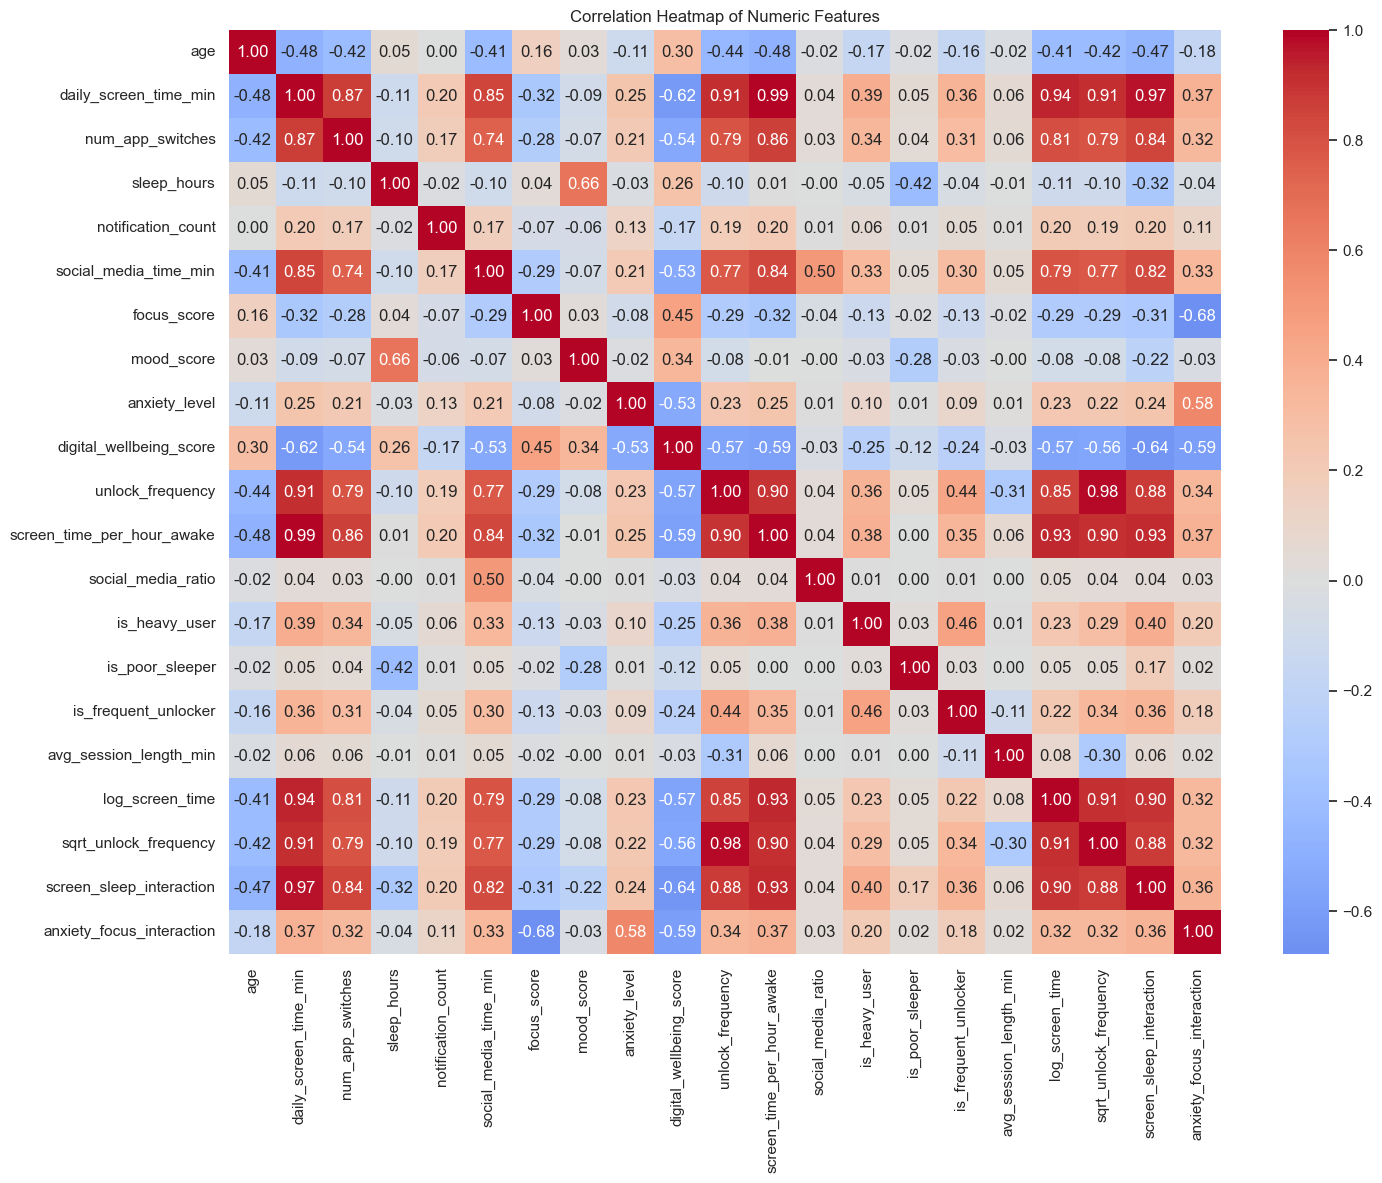

In [22]:
# Correlation Heatmap

FILE_PATH = "digital_wellbeing_engineered.csv"
df = pd.read_csv(FILE_PATH)

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

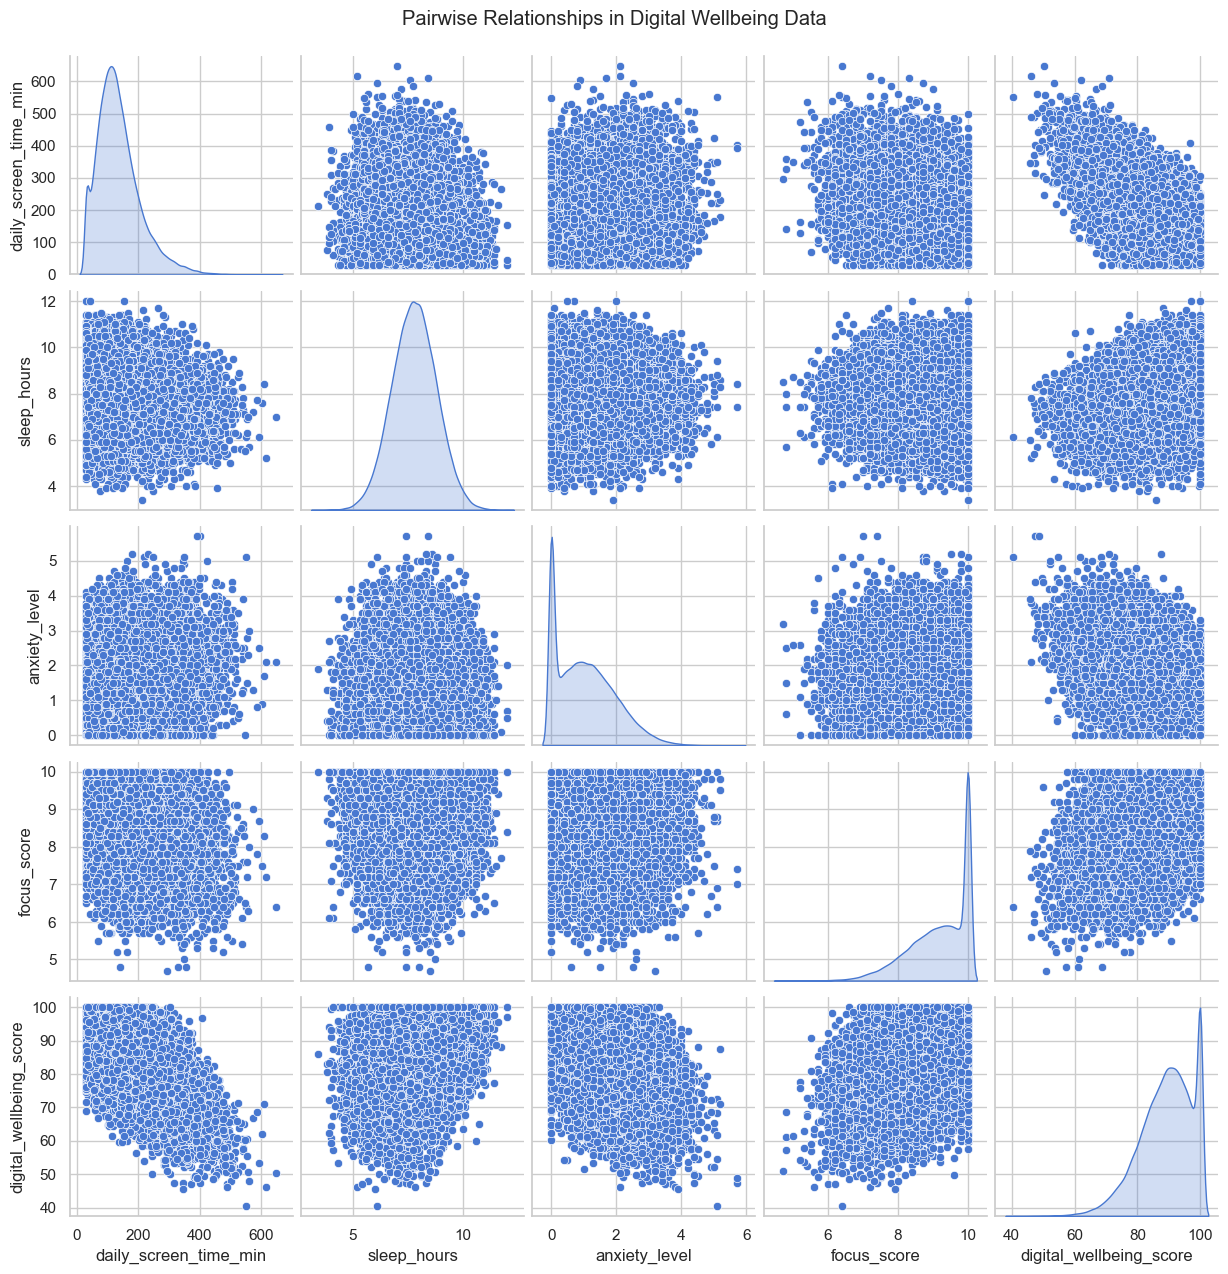

In [21]:
# Pairplot for selected features
sns.pairplot(df[["daily_screen_time_min","sleep_hours","anxiety_level","focus_score","digital_wellbeing_score"]], diag_kind="kde")
plt.suptitle("Pairwise Relationships in Digital Wellbeing Data", y=1.02)
plt.show()

#### Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# 1. Preprocessing: Encode categorical variables

FILE_PATH = "digital_wellbeing_engineered.csv"
df = pd.read_csv(FILE_PATH)

# Drop user_id (not useful for modeling)
df = df.drop(columns=["user_id"])

# Identify categorical columns
categorical_cols = ["gender", "age_group", "profession_category", "city_tier", "profession"]

# One-hot encode categoricals
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 2. Regression (digital_wellbeing_score)

X_reg = df_encoded.drop(columns=["digital_wellbeing_score"])
y_reg = df_encoded["digital_wellbeing_score"]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scale for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

lin_reg.fit(X_train_scaled, y_train)
rf_reg.fit(X_train, y_train)  # RF doesn’t need scaling

# Evaluate
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_rf = rf_reg.predict(X_test)

print("\n Regression Results:")
print(f"Linear Regression R²: {r2_score(y_test, y_pred_lin):.3f}, MAE: {mean_absolute_error(y_test, y_pred_lin):.2f}")
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf):.3f}, MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")


 Regression Results:
Linear Regression R²: 0.690, MAE: 3.71
Random Forest R²: 0.677, MAE: 3.79


In [11]:
# lc = LabelEncoder()
# df.profession = lc.fit_transform(df.profession)
# df.gender = lc.fit_transform(df.gender)
# df.city_tier = lc.fit_transform(df.city_tier)
# df.age_group = lc.fit_transform(df.age_group)
# df.profession_category = lc.fit_transform(df.profession_category)


📊 Classification Results:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19987
           1       1.00      1.00      1.00        13

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



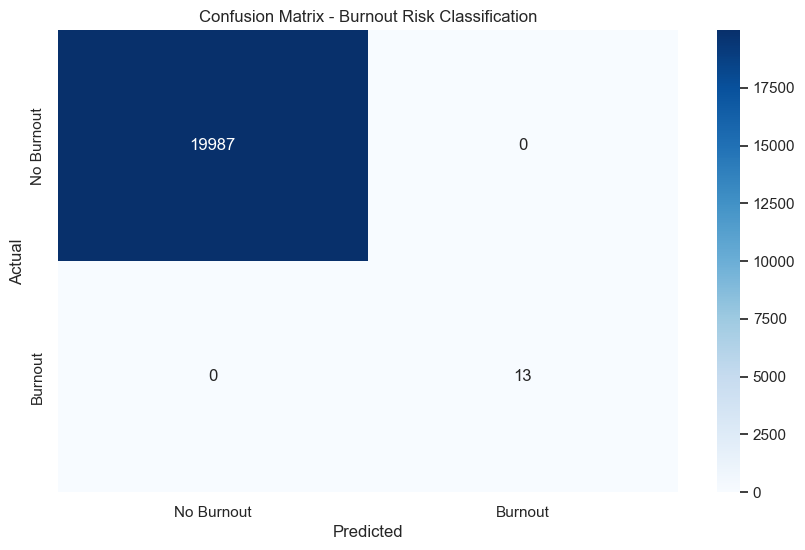

In [6]:
# 3. Classification: Predict Burnout Risk
# Define burnout risk
df_encoded["burnout_risk"] = np.where(
    (df_encoded["digital_wellbeing_score"] < 40) |
    ((df_encoded["is_heavy_user"] == 1) & (df_encoded["is_poor_sleeper"] == 1)), 1, 0
)

X_clf = df_encoded.drop(columns=["digital_wellbeing_score", "burnout_risk"])
y_clf = df_encoded["burnout_risk"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_c, y_train_c)

# Evaluate
y_pred_c = clf.predict(X_test_c)

print("\n Classification Results:")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred_c)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Burnout", "Burnout"], yticklabels=["No Burnout", "Burnout"])
plt.title("Confusion Matrix - Burnout Risk Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




🔥 Top 10 Features Driving Burnout Risk:
is_poor_sleeper               0.258975
sleep_hours                   0.196598
screen_sleep_interaction      0.176884
daily_screen_time_min         0.073868
screen_time_per_hour_awake    0.065087
is_heavy_user                 0.053451
log_screen_time               0.047485
mood_score                    0.030539
social_media_time_min         0.013160
sqrt_unlock_frequency         0.012024
dtype: float64


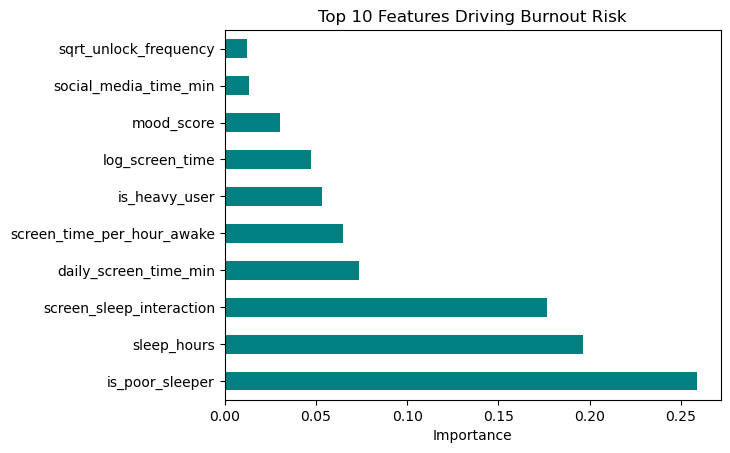

In [17]:
# 4. Feature Importance (Classification)

importances = pd.Series(clf.feature_importances_, index=X_clf.columns).sort_values(ascending=False)
print("\n Top 10 Features Driving Burnout Risk:")
print(importances.head(10))

# Plot
importances.head(10).plot(kind="barh", color="teal")
plt.title("Top 10 Features Driving Burnout Risk")
plt.xlabel("Importance")
plt.show()